##**SVM**
Support Vector Machine (SVM) is a powerful supervised machine learning algorithm used both for classification and regression.

SVMs have been used in various domains including image classification, text categorization, bioinformatics, and even in financial time series forecasting.

The main idea behind SVM is to find a hyperplane (or a decision boundary) that best separates the data into classes. In a two-dimensional space, this hyperplane is simply a line. For a dataset with more features, this could be a multi-dimensional plane.

These are the data points that are closest to the hyperplane and essentially "support" or define the hyperplane. The SVM algorithm tries to maximize the margin between these data points and the hyperplane.
At its core, SVM is an optimization problem. It aims to find the hyperplane that maximizes the margin while minimizing the classification error (in the case of soft margin SVM).

In conclusion, SVM is a versatile algorithm that can capture complex relationships in data, but it requires careful tuning and preprocessing to perform optimally.

In [11]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import accuracy_score


In [12]:
df = pd.read_csv('/content/kaggle.csv')


In [13]:
# Lista de columnas a eliminar
columnas_a_eliminar = ['Cc', 'What Dinosaurs Eat']

# Borrar las columnas
df = df.drop(columns=columnas_a_eliminar)

# Sobrescribir el archivo CSV original
df.to_csv('/content/kaggle.csv', index=False)

In [14]:
from sklearn.preprocessing import LabelEncoder

#LabelEncoder
le = LabelEncoder()

# To trhasform
columnas_a_transformar = ['Accepted Name', 'Country', 'Diet', 'Early Interval', 'Formation', 'Geological Interval', 'Geological Time Period', 'Ref Author', 'State']

for col in columnas_a_transformar:
    df[col] = le.fit_transform(df[col])

# Save the results
df.to_csv('/content/kaggle.csv', index=False)


In [20]:
#The training is defined
X = df.drop('Country', axis=1)
y = df['Country']


In [21]:
# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


These lines of code are normalizing the characteristics of the training and test sets. Specific:

A StandardScaler object is created that will be used to normalize the data.
The scaler is fitted to the training data (X_train) and then that data is transformed. This means that the scaler calculates the mean and standard deviation of X_train and then uses these values to scale (normalize) X_train.
The scaler (pre-fitted to the training data) is used to transform the test data (X_test). It is important that X_test be transformed using the mean and standard deviation of X_train to ensure consistency.

In [22]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


These lines of code are creating and training a Support Vector Machine (SVM) model:

An SVC object is created with a linear kernel, which is a type of Support Vector Machine.
The SVM model is trained (tuned) using the training data (X_train and y_train).

In [23]:
clf = SVC(kernel='linear')  # Puedes probar diferentes kernels como 'rbf', 'poly', etc.
clf.fit(X_train, y_train)


SVC(kernel='linear')

In [24]:
y_pred = clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")

Accuracy: 97.36%


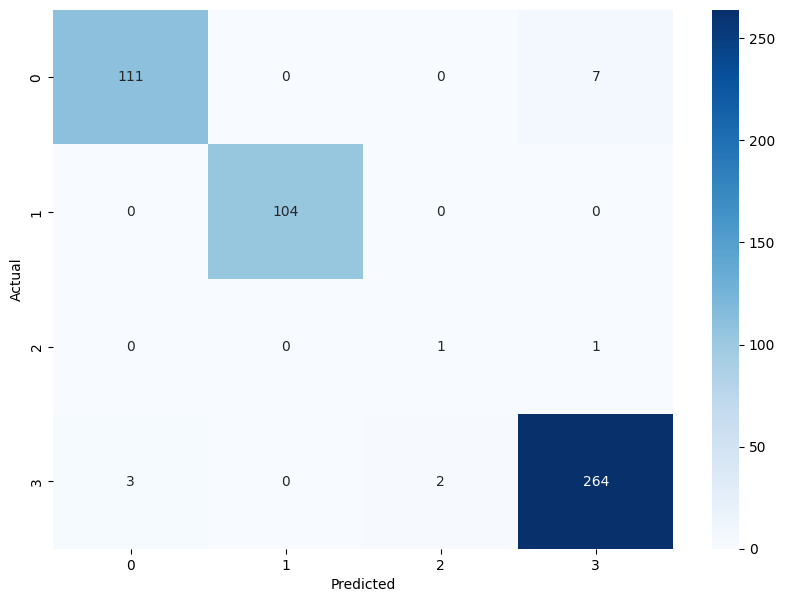

In [25]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Calcular la matriz de confusión
cm = confusion_matrix(y_test, y_pred)

# Visualizar la matriz de confusión
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='g', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


In [26]:
from sklearn.metrics import classification_report

# Mostrar el informe de clasificación
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.97      0.94      0.96       118
           1       1.00      1.00      1.00       104
           2       0.33      0.50      0.40         2
           3       0.97      0.98      0.98       269

    accuracy                           0.97       493
   macro avg       0.82      0.86      0.83       493
weighted avg       0.97      0.97      0.97       493

